# Proyek Analisis Data: Brazilian E-Commerce Public Dataset
- **Nama:** Intan Dwi Febryanti
- **Email:** intan.dwikarya@gmail.com
- **ID Dicoding:** m008b4kx1985

## Menentukan Pertanyaan Bisnis

- Which month had the highest number of purchases in 2017?
- Which state have the largest source of customers in 2017?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data Wrangling

### Gathering Data

In [4]:
df = pd.read_csv("olist_customers_dataset.csv", delimiter=",")
df1 = pd.read_csv("olist_orders_dataset.csv", delimiter=",")

**Insight:**
- df is the customers dataset
- df1 is the orders dataset

### Assessing Data

#### Customers Dataset

In [5]:
df.isnull().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [6]:
df.duplicated().sum()

0

#### Orders Dataset

In [7]:
df1.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [8]:
df1.duplicated().sum()

0

**Insight:**
- There is no null value or duplicated value in df
- There is some null value in df1, but no duplicated value

### Cleaning Data

#### Customer Dataset

In [9]:
df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [10]:
df = df.drop(['customer_unique_id', 'customer_zip_code_prefix', 'customer_city'], axis=1)
df

,customer_id,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,SP
1,18955e83d337fd6b2def6b18a428ac77,SP
2,4e7b3e00288586ebd08712fdd0374a03,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,SP
...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,CE
99439,56b18e2166679b8a959d72dd06da27f9,RS


#### Orders Dataset

In [11]:
df1

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [12]:
df1 = df1.drop(['order_status', 'order_approved_at', 'order_delivered_carrier_date', 'order_estimated_delivery_date', 'order_delivered_customer_date'], axis=1)
df1

,order_id,customer_id,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39
...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27


**Insight:**
- In the customer dataset there are several columns that are not used so they can be dropped.
- In the orders dataset, there are several columns that are not used and also have many null values ​​in several columns so they can be dropped.

## Exploratory Data Analysis (EDA)

### Number of registered customers

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64


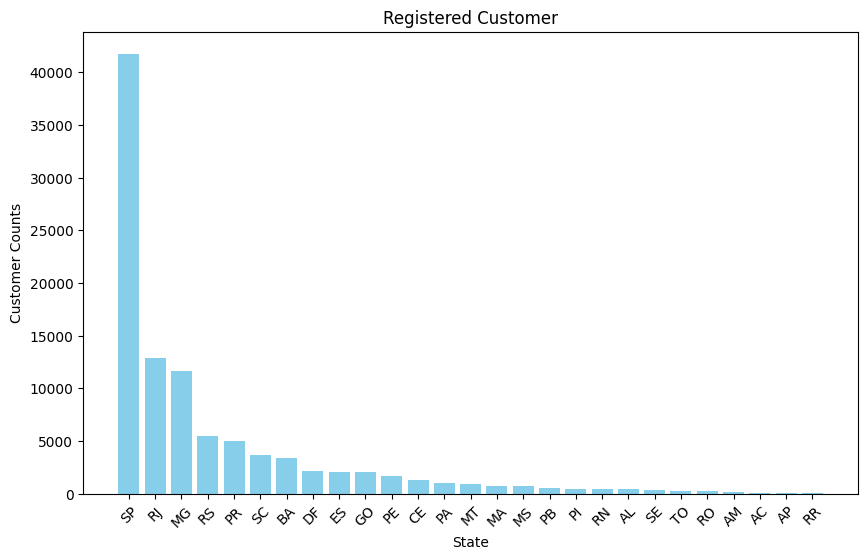

In [13]:
# Counts registered customer in every state
state_counts = df['customer_state'].value_counts()
print(state_counts)

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(state_counts.index, state_counts.values, color='skyblue')
plt.title('Registered Customer')
plt.xlabel('State')
plt.ylabel('Customer Counts')
plt.xticks(rotation=45)
plt.show()

### Number of purchases each year

Year
2016      329
2017    45101
2018    54011
Name: count, dtype: int64


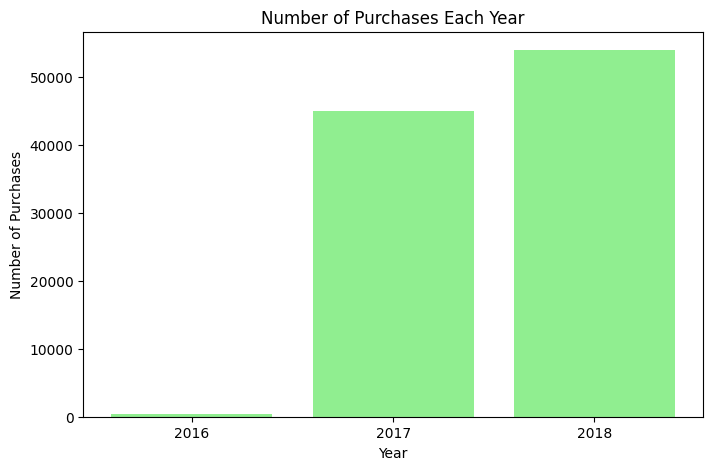

In [14]:
# Change the 'order_purchase_timestamp' column to datetime type
df1['order_purchase_timestamp'] = pd.to_datetime(df1['order_purchase_timestamp'])

# Extracting year'
df1['Year'] = df1['order_purchase_timestamp'].dt.year

# Counts number of purchases each year in dataset
yearly_orders = df1['Year'].value_counts().sort_index()
print(yearly_orders)

# Visualization
plt.figure(figsize=(8, 5))
plt.bar(yearly_orders.index, yearly_orders.values, color='lightgreen')
plt.title('Number of Purchases Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Purchases')
plt.xticks(yearly_orders.index)
plt.show()

**Insight:**
- From the customer dataset, it can be analyzed that the largest number of registered customers are in the SP state.
- From the orders dataset, it can be analyzed that the number of purchases tends to increase every year and the highest number of purchases received was in 2018.

## Visualization & Explanatory Analysis

### Question 1: Which month had the highest number of purchases in 2017?

<ipython-input-19-6a7cee128036>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016['Month'] = df_2016['order_purchase_timestamp'].dt.month
<ipython-input-19-6a7cee128036>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017['Month'] = df_2017['order_purchase_timestamp'].dt.month
<ipython-input-19-6a7cee128036>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

       2016  2017  2018
Month                  
1         0   800  7269
2         0  1780  6728
3         0  2682  7211
4         0  2404  6939
5         0  3700  6873
6         0  3245  6167
7         0  4026  6292
8         0  4331  6512
9         4  4285    16
10      324  4631     4
11        0  7544     0
12        1  5673     0


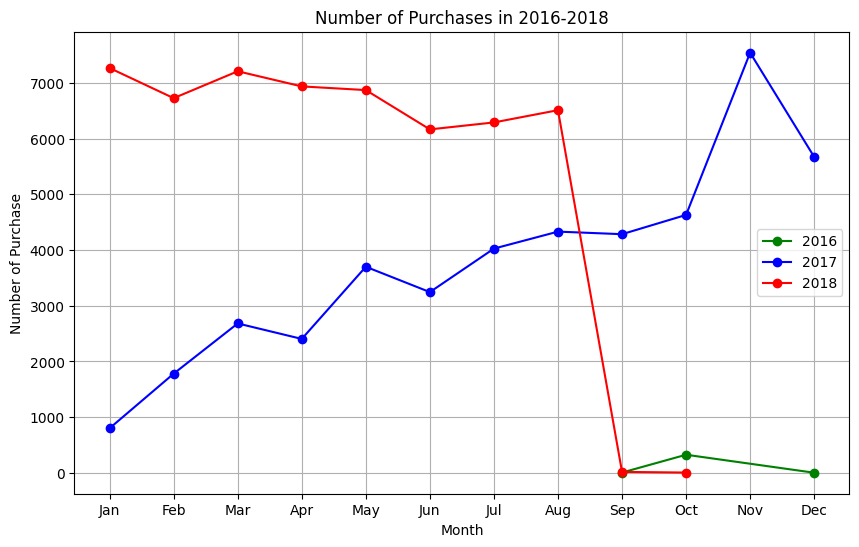

In [19]:
# Data filter only for each year
df_2016 = df1[df1['order_purchase_timestamp'].dt.year == 2016]
df_2017 = df1[df1['order_purchase_timestamp'].dt.year == 2017]
df_2018 = df1[df1['order_purchase_timestamp'].dt.year == 2018]

df_2016['Month'] = df_2016['order_purchase_timestamp'].dt.month
df_2017['Month'] = df_2017['order_purchase_timestamp'].dt.month
df_2018['Month'] = df_2018['order_purchase_timestamp'].dt.month

# Calculate the number of purchases per month
monthly_purchases_2016 = df_2016['Month'].value_counts().sort_index()
monthly_purchases_2017 = df_2017['Month'].value_counts().sort_index()
monthly_purchases_2018 = df_2018['Month'].value_counts().sort_index()

monthly_comparison = pd.DataFrame({
    '2016': monthly_purchases_2016,
    '2017': monthly_purchases_2017,
    '2018': monthly_purchases_2018
}).fillna(0).astype(int)
print(monthly_comparison)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(monthly_purchases_2016.index, monthly_purchases_2016.values, marker='o', color='green', linestyle='-', label='2016')
plt.plot(monthly_purchases_2017.index, monthly_purchases_2017.values, marker='o', color='blue', linestyle='-', label='2017')
plt.plot(monthly_purchases_2018.index, monthly_purchases_2018.values, marker='o', color='red', linestyle='-', label='2018')
plt.title('Number of Purchases in 2016-2018')
plt.xlabel('Month')
plt.ylabel('Number of Purchase')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend()
plt.show()

### Question 2: Which state have the largest source of customers in 2017?

Number of unique customers who place orders per month in each year
Month    1     2     3     4     5     6     7     8     9     10    11    12
Year                                                                         
2016      0     0     0     0     0     0     0     0     4   324     0     1
2017    800  1780  2682  2404  3700  3245  4026  4331  4285  4631  7544  5673
2018   7269  6728  7211  6939  6873  6167  6292  6512    16     4     0     0

The number of unique customers placing orders per state in each year
customer_state  AC   AL  AM  AP    BA   CE    DF    ES    GO   MA  ...    PR  \
Year                                                               ...         
2016             0    2   0   0     4    8     6     4     9    4  ...    20   
2017            54  207  75  29  1592  660   921   968   955  387  ...  2270   
2018            27  204  73  39  1784  668  1213  1061  1056  356  ...  2755   

customer_state    RJ   RN   RO  RR    RS    SC   SE     SP   TO  
Year  

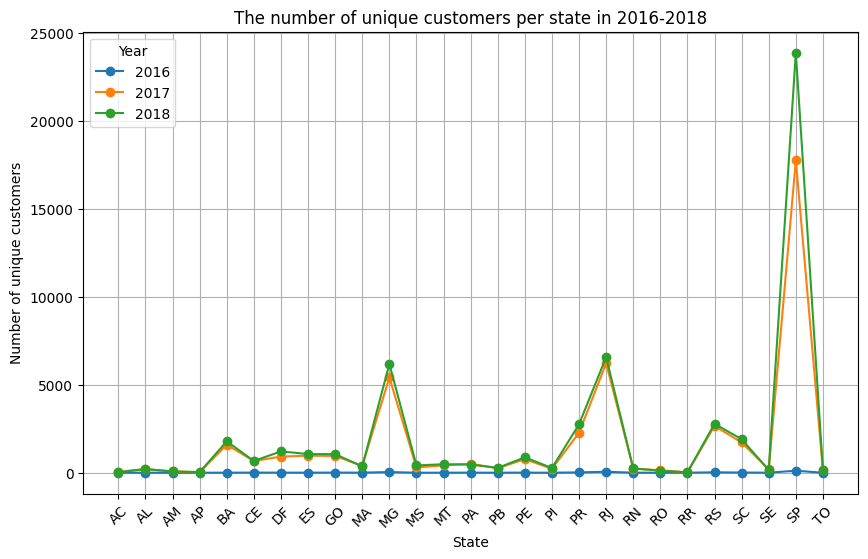

In [27]:
# Merge order data with customer data based on CustomerID
merged_data = pd.merge(df1, df, on='customer_id')

merged_data['Year'] = merged_data['order_purchase_timestamp'].dt.year
merged_data['Month'] = merged_data['order_purchase_timestamp'].dt.month

# Count the number of unique customers who place orders per month in each year
monthly_customers = merged_data.groupby(['Year', 'Month'])['customer_id'].nunique().unstack(fill_value=0)
print("Number of unique customers who place orders per month in each year")
print(monthly_customers)

# Count the number of unique customers placing orders per state in each year
state_customers = merged_data.groupby(['Year', 'customer_state'])['customer_id'].nunique().unstack(fill_value=0)
print("\nThe number of unique customers placing orders per state in each year")
print(state_customers)

# Visualization
plt.figure(figsize=(10, 6))
for year in state_customers.index:
    plt.plot(state_customers.columns, state_customers.loc[year], marker='o', label=str(year))

plt.title('The number of unique customers per state in 2016-2018')
plt.xlabel('State')
plt.ylabel('Number of unique customers')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Year")
plt.show()

**Insight:**
- The first graph is for question 1, shows the number of purchases from 2016 to 2018, with fluctuations clearly visible in each year. In 2016 shows a stable number of purchases although there are some months with no data, while 2017 saw a significant increase, especially in certain months, before experiencing a significant decline in December. While in 2018 the graph tends to show a decline.
- The second graph is for question 2, shows a significant variation in the distribution of unique customers across states. Some state, such as MG, RJ, SP showing significantly higher customer numbers in 2017 and 2018.

## Conclusion

- Which month had the highest number of purchases in 2017?
- Based on the visualized graph 1 it can be seen that purchases in 2017 were the best, besides the fact that 2017 most likely had the most complete data for each month, but in 2017 the graph also tended to increase compared to the previous or subsequent years. It can be seen that the highest increase was in November with a total of 7544 purchases. So it can be concluded that the month with the highest number of purchases in 2017 was November.
- Which state have the largest source of customers in 2017?
- Based on the visualized graph 2, it can be seen that the largest number of customers is in the SP state. However, not only in 2017, but in 2016 and 2018 SP also ranked at the top for the largest number of customers. In 2017, the SP state reached 17760 customers, this is an increase in the number of customers in SP state, because previously in 2016 the number of customers in SP was only 115, and then there was a significant increase in 2018 so that it reached 23871 customers.